In [1]:
# importing

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
%matplotlib inline


from IPython.display import display, Math, Latex, HTML, clear_output
from scipy import optimize

# set plot text soze
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

import itertools

In [2]:
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
import pickle
import random

# 1.Preparation 

## 1.1 Parameters for model 

In [4]:
N_eig = 15

In [5]:
#np.save('new_eigenvalues', eigenvalues)
eigenvalues = np.load('lab2_data/new_eigenvalues.npy')
print(list(eigenvalues))

[(-4.0634477007783438+5.449253669660056j), (-2.3812598117215655+4.5727767454056627j), (-2.0818544666390366+3.338904772165459j), (-4.1600706157232645+0.59493492717025109j), (-0.44738644977382724+4.3253659298876048j), (-1.7087487863145079+3.1725557135407749j), (-2.2223747795561066+4.2248865061699155j), (-0.77799086684856189+5.0142852345559108j), (-0.38459864630598639+0.49380209829310284j), (-3.2997638501510886+1.9383956356352221j), (-2.8298397772329404+5.9989950235578391j), (-0.40125993272094096+5.7801192947621853j), (-3.0819422932146487+1.1734437788363288j), (-0.49678682964610532+0.35221140996145817j), (-4.318565307036585+4.1777408620659653j)]


In [6]:
#fc&fs
fc = np.ones(N_eig)
fs = np.ones(N_eig)

[]

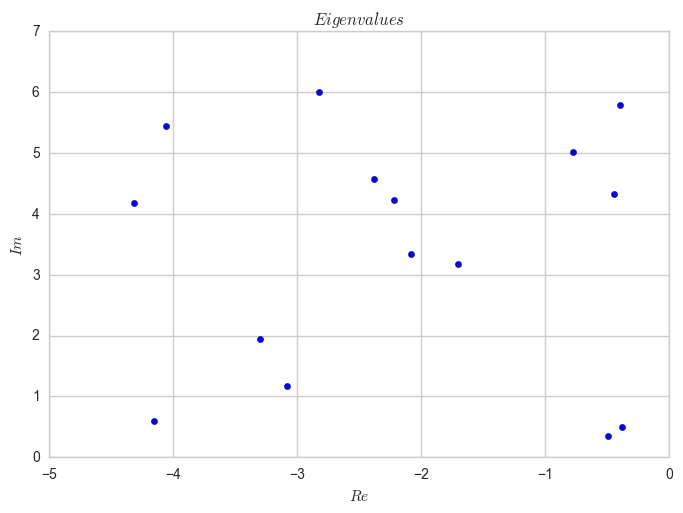

In [7]:
#plot eigenvalues

fig1, axes1 = plt.subplots()

axes1.scatter(eigenvalues.real, eigenvalues.imag)
axes1.set_xlabel('$Re$')
axes1.set_ylabel('$Im$')
axes1.set_title('$Eigenvalues$')
axes1.grid(True)

plt.plot()

## 1.2 Generate error

In [8]:
def norm_error(eps, n):
    error = []
    for i in range(n):
        a = np.random.normal(scale=eps/3)
        while abs(a)>eps:
            a = np.random.normal(scale=eps/3)
        error.append(a)
    return np.array(error)

In [9]:
def uniform_error(eps, n):
    return np.random.uniform(-eps, eps, size=n)

In [10]:
def two_peaks_error(eps, n):
    error = []
    for i in range(int(n/2)):
        a = np.random.normal(loc=-0.2, scale=eps/3)
        while abs(a)>eps:
            a = np.random.normal(loc=-0.2, scale=eps/3)
        error.append(a)
        a = np.random.normal(loc=0.2, scale=eps/3)
        while abs(a)>eps:
            a = np.random.normal(loc=0.2, scale=eps/3)
        error.append(a)
    if len(error)<n:
        a = np.random.normal(loc=0.2, scale=eps/3)
        while abs(a)>eps:
            a = np.random.normal(loc=0.2, scale=eps/3)
        error.append(a)
    return np.array(error)

## 1.3 Generate Y

$$y_k=\sum_{q=1}^{k-1} h_{k-j}u_j,$$
$$h_k=\sum_{p=1}^P \left(\rho_p^k (f_q^c\cos\omega_p(k-1)+f_q^s\sin\omega_p(k-1)\right)$$,
<center>$\rho_p=\sqrt{\alpha_p^2+\beta_p^2}$,
$\omega_p=arccos\frac{\alpha_p}{\sqrt{\alpha_p^2+\beta_p^2}}$,
$\alpha_p=e^{\lambda_p\Delta}\cos\gamma_p\Delta$,
$\beta_p=e^{\lambda_p\Delta}\sin\gamma_p\Delta$</center>

We set $f_q^c=1$, $f_q^c=1$.

In [11]:
def y_cont(t, eigen, f_c, f_s):
    """continious impulse response"""
    res = 0
    for i in range(N_eig):
        res += (f_c[i]*np.cos(eigen[i].imag*t)+f_s[i]*np.sin(eigen[i].imag*t))*np.exp(eigen[i].real*t)
    return res

[]

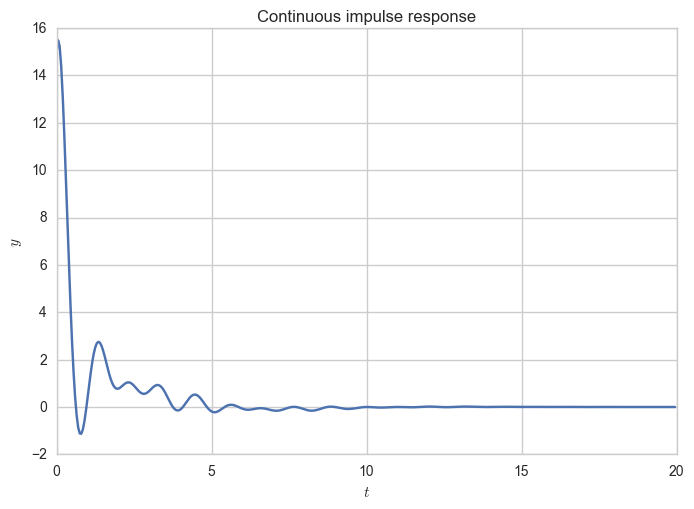

In [12]:
t = np.arange(0, 20, 0.05)
y_c = list(map(lambda x: y_cont(x, eigenvalues, fc, fs), t))

fig2, axes2 = plt.subplots()

axes2.plot(t, y_c)
axes2.set_xlabel('$t$')
axes2.set_ylabel('$y$')
axes2.set_title('Continuous impulse response')

plt.plot()
#mpld3.display(fig2)

In [13]:
Eps = 0.5 #0.01 - 0.05    *max(y)

In [14]:
T = 19

In [15]:
delta = 0.1

## 1.4 Generate parameters

In [16]:
# phi = np.random.uniform(0, np.pi/2, size=32)
# u_coef = np.random.uniform(-1, 1, size=32)
# w = np.random.uniform(0, 10, size=32)

# with open("coef.gub", 'wb') as f:
#     pickle.dump([phi, u_coef, w], f)

In [17]:
with open("coef.gub", 'rb') as f:
    phi, u_coef, w = pickle.load(f)

In [18]:
print("PHI:\n", phi)
print("Ui:\n",u_coef)
print("Omega:\n", w)

PHI:
 [ 0.88645536  1.39921035  1.1665359   0.29173978  1.34741915  0.60100016
  1.15305948  1.12515639  0.80635049  1.45660782  0.71225658  0.658791
  0.57253192  1.51482525  1.26813138  0.61657971  0.74608005  0.85226718
  0.50149729  1.46228747  0.11837308  0.90992886  0.71204558  1.29399535
  0.11752518  1.46945248  0.29435144  0.79814738  1.03170916  0.34214745
  0.11544082  0.68534723]
Ui:
 [-0.11789808 -0.86986922 -0.21111082  0.76037711 -0.26592747  0.49831496
 -0.24259664  0.88407233  0.59051732  0.72081242 -0.09049551 -0.64502494
 -0.84631457 -0.90876198  0.05692396 -0.44510969  0.43411875  0.27525729
 -0.29215131 -0.90913443  0.07041099  0.41188082 -0.28139421 -0.55185824
 -0.63760942 -0.9911288   0.65128928  0.52799101 -0.9774333   0.32299422
  0.31126519 -0.63841909]
Omega:
 [ 5.62604574  7.90869003  8.29376074  5.82840505  4.77517232  7.44410022
  4.23917792  5.5601819   9.06668083  7.88265746  4.26356245  7.517868
  2.47350073  1.62032461  5.90859046  8.55196918  3.50992

<center>$\alpha_p=e^{\lambda_p\Delta}\cos\gamma_p\Delta$</center> 
<center>$\beta_p=e^{\lambda_p\Delta}\sin\gamma_p\Delta$</center>

In [19]:
def gen_alpha_beta(delta):
    alpha = [np.exp(el.real*delta)*np.cos(el.imag*delta) for el in eigenvalues]
    beta = [np.exp(el.real*delta)*np.sin(el.imag*delta) for el in eigenvalues]
    return np.array(alpha), np.array(beta)

In [20]:
N = int(T/delta)

In [21]:
print(N)

190


In [22]:
alpha, beta = gen_alpha_beta(delta)

<center>$\rho_p=\sqrt{\alpha_p^2+\beta_p^2}$, $\omega_p=arccos\frac{\alpha_p}{\sqrt{\alpha_p^2+\beta_p^2}}$ </center>

---
$$y_k=\sum_{q=1}^{k-1} h_{k-j}u_j,$$
---
$$h_k=\sum_{p=1}^P \left(\rho_p^k (f_q^c\cos\omega_p(k-1)+f_q^s\sin\omega_p(k-1))\right)$$
---

In [23]:
def gen_realy_u_h(delta, N, alpha, beta):
    rho = [np.sqrt(alpha[i]**2+beta[i]**2) for i in range(len(alpha))]
    omega = [np.arccos(alpha[i]/rho[i]) for i in range(len(alpha))]
    #print(len(rho), len(omega))
    h = [sum([rho[j]**i*(fc[j]*np.cos(omega[j]*i)+fs[j]*np.sin(omega[j]*i)) for j in range(len(omega))]) for i in range(N)]
    u = [sum([u_coef[i]*np.sin(w[i]*delta*k+phi[i]) for i in range(32)]) for k in range(N)]
    u /= max(map(abs, u))
    y = [sum([h[i-j]*u[j] for j in range(i+1)]) for i in range(N)]
    return np.array(y), np.array(u), np.array(h)

In [24]:
y_real, u, h_real = gen_realy_u_h(delta, N, alpha, beta)

In [25]:
np.random.seed(0)
error1 = two_peaks_error(Eps, N)
print(error1)
y = y_real+error1

[ 0.09400872  0.26669287 -0.036877    0.03712035 -0.04165193  0.1747738
 -0.21720314  0.26843308 -0.17599274  0.44237892 -0.07316038  0.22027917
 -0.12602279  0.25561239  0.04901318  0.16580696 -0.14782205  0.05765071
 -0.09106357  0.3440727  -0.32369417 -0.04239428 -0.19237358  0.16880269
  0.0554632   0.44489313 -0.17417543  0.26302709 -0.34796429 -0.13013274
 -0.25798536  0.22605816  0.00504845  0.40039664 -0.26455447  0.14961621
 -0.37475883 -0.03666966 -0.48437837  0.11505797 -0.27301238 -0.00879923
 -0.07041827 -0.06898297 -0.23545671  0.05075557 -0.13551625  0.11486581
 -0.39677203  0.19530296 -0.12861135  0.2110862  -0.14958802  0.09427965
 -0.26045686  0.08792326 -0.25992553  0.06447562 -0.48771377  0.22957102
 -0.26696349 -0.07169972 -0.12286962  0.04878361 -0.19134243  0.32151509
 -0.17850285  0.38990011 -0.4058043   0.26705694 -0.31413502  0.05486714
 -0.29647494  0.14807458 -0.19063911  0.00580836 -0.04986225  0.27761041
 -0.45604061  0.44804203  0.11598153  0.39646326 -0.

[]

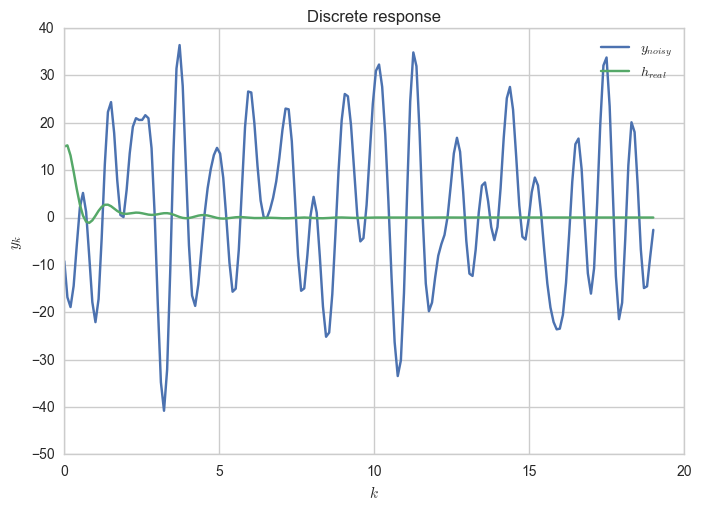

In [26]:
t = np.linspace(0, T, N)

fig3, axes3 = plt.subplots()

axes3.plot(t, y_real, label = '$y_{noisy}$')
axes3.plot(t, h_real, label = '$h_{real}$')
axes3.set_xlabel('$k$')
axes3.set_ylabel('$y_k$')
axes3.legend()
axes3.set_title('Discrete response')

plt.plot()

In [27]:
def plot_error(error, eps,folder=''):
    """
    generate hist for error
    """
    fig4, axes4 = plt.subplots()

    weights = np.ones_like(error)/(float(len(error)))

    n, bins, patches = axes4.hist(error, 50, range = (-1.0, 1.0), facecolor='blue', weights=weights)

    axes4.set_xlabel('error')
    axes4.set_ylabel('likelihood')
    axes4.set_xlim(-1.3*eps, 1.3*eps)
    axes4.set_ylim(0, max(n)+0.05)
    axes4.set_title('Error plot')
    
    plt.plot()

In [28]:
def generate_values(eps, delta, T, gen_error, if_plot=False, folder = ''):
    """
    return: alpha, beta, y_real, u, h_real, error, y
    """
    np.random.seed(0)
    N = int(T/delta)
    K = N+5
    
    alpha, beta = gen_alpha_beta(delta)
    y_real, u, h_real = gen_realy_u_h(delta, N+K, alpha, beta)

    #np.random.seed()
    error = gen_error(eps, N+K)
    assert(len(error) == len(y_real))
    y = y_real + error
    
    if if_plot:        
        t = [delta*i for i in range(N+K)]
        
        fig2, axes2 = plt.subplots(figsize=(16, 7))
        
        axes2.plot(t, u, label = '$u$')
        axes2.set_xlabel('$k$')
        axes2.set_ylabel('$y_{k}$')
        axes2.legend()
        axes2.set_title('U')
        
        fig3, axes3 = plt.subplots(figsize=(16, 7))

        axes3.plot(t, y_real, label = '$y_{noisy}$')
        axes3.plot(t, h_real, label = '$h_{real}$')
        axes3.set_xlabel('$k$')
        axes3.set_ylabel('$y_k$')
        axes3.legend()
        axes3.set_title('Discrete response')
        
        fig4, axes4 = plt.subplots(figsize=(16, 7))

        axes4.plot(t, [y_real[i]/error[i] for i in range(N+K)])
        axes4.set_xlabel('k')
        axes4.set_ylabel('$y_k$/$error_k$')
        axes4.set_title('Signal/error (k)')
        plt.plot()
        #mpld3.display(fig3)
        
        plot_error(error, eps, folder)
    return alpha, beta, y_real, u, h_real, error, y

## 1.6 Calculating confidence intervals

In [29]:
def random_combination(iterable, r):
    # combinations('ABCD', 2) --> AB AC AD BC BD CD
    # combinations(range(4), 3) --> 012 013 023 123
    "Random selection from itertools.combinations(iterable, r)"
    pool = tuple(iterable)
    n = len(pool)
    indices = sorted(random.sample(range(n), r))
    return tuple(pool[i] for i in indices)

In [30]:
def calc_confidence_intervals(u, y, eps):
    #print(len(u))
    N = int((len(u)-5)/2)
    K = N + 5
    #The Toeplitz matrix has constant diagonals, with c as its first column and r as its first row. 
    matr = scipy.linalg.toeplitz(c=u[N:N+K], r=u[N::-1])
    h_low = np.ones(N)*-1000
    h_up = np.ones(N)*1000
    satisfied = 0
    combinations = []
    #for i in range(min(2000, int(scipy.special.binom(K, K-N-1)))):
    print("binom: ", scipy.special.binom(K, K-N-1))
    for i in range(int(scipy.special.binom(K, K-N-1))):
        comb = random_combination(range(K), K-N-1)
        while comb in combinations:
            comb = random_combination(range(K), K-N-1)
        combinations.append(comb)
        U = np.delete(matr, comb, 0)
        y_vec = np.delete(y[N:], comb)
        if np.linalg.cond(U, p=2) < 100: # condition number
            satisfied += 1
            U_inv = scipy.linalg.inv(U)
            h_cent_temp = np.dot(U_inv, y_vec)
            h_delta = [eps*sum(abs(U_inv[i])) for i in range(len(h_cent_temp))]
            h_up_temp = h_cent_temp + h_delta
            h_low_temp = h_cent_temp - h_delta
            h_low = [max(h_low[i], h_low_temp[i]) for i in range(N)]
            h_up = [min(h_up[i], h_up_temp[i]) for i in range(N)]
        h_cent = [(h_low[i]+h_up[i])/2 for i in range(N)]
    print("equations:", satisfied)
    return h_cent, h_low, h_up

In [31]:
def calc_percent(h_real, h_low, h_up):
    return sum([int(h_low[i]<=h_real[i] and h_up[i]>=h_real[i]) for i in range(len(h_low))])/float(len(h_low))

In [32]:
def plot_res(T, delta, h_real, h_low, h_up,folder=''):
    '''
    plot true interval for h
    '''
    t = np.linspace(0, T, int(T/delta))

    fig, ax = plt.subplots(figsize=(16, 7))
    ax.plot(t, h_real[:len(t)], label='$h_{real}$')
    #ax.plot(t, list(map(lambda x: y_cont(x, eigenvalues, fc, fs), t)), label='$h_{cont}$')
    ax.plot(t, h_up, label = '$h_{upper}$')
    ax.plot(t, h_low, label = '$h_{low}$')
    ax.legend()
    ax.set_xlabel('k')
    ax.set_title('$h_k$')

    print("% =", calc_percent(h_real, h_low, h_up))

In [33]:
def calculate_perc_for_seq(eps, delta, T, gen_error, delta_delta = -0.01):
    perc = {}
    for i in range(10):
        delta +=delta_delta
        if delta < 0.000000001:
            break
        alpha, beta, y_real, u, h_real, error, y = generate_values(eps, delta, T, gen_error)
        h_cent, h_low, h_up = calc_confidence_intervals(u, y, eps)
        print("max interval width:", max([h_up[i] - h_low[i] for i in range(int(T/delta))]))
        perc["{0:.3f}".format(delta)] = calc_percent(h_real, h_low, h_up)
    return perc

In [34]:
calculate_perc_for_seq(0.4, 1, T, norm_error)

binom:  10626.0
equations: 8033
max interval width: 3.65687053334
binom:  10626.0
equations: 8326
max interval width: 2.45554787413
binom:  10626.0
equations: 6547
max interval width: 3.59323468873
binom:  10626.0
equations: 4440
max interval width: 6.34013020018
binom:  12650.0
equations: 0
max interval width: 2000.0
binom:  12650.0
equations: 5806
max interval width: 9.35085629844
binom:  12650.0
equations: 7777
max interval width: 4.52192073641
binom:  12650.0
equations: 9069
max interval width: 3.01025172248
binom:  12650.0
equations: 5016
max interval width: 6.83675761639
binom:  14950.0
equations: 0
max interval width: 2000.0


{'0.900': 1.0,
 '0.910': 1.0,
 '0.920': 1.0,
 '0.930': 1.0,
 '0.940': 1.0,
 '0.950': 1.0,
 '0.960': 1.0,
 '0.970': 1.0,
 '0.980': 1.0,
 '0.990': 1.0}

In [35]:
def make_results(eps, delta, T, gen_error, folder=''):
    alpha, beta, y_real, u, h_real, error, y = generate_values(eps, delta, T, gen_error, if_plot=True, folder = folder)
    h_cent, h_low, h_up = calc_confidence_intervals(u, y, eps)
    #h_low, h_up = calc_confidence_intervals(h_cent, eps, u0, u1)
    plot_res(T, delta, h_real, h_low, h_up, folder)
    return y, u, h_cent, h_low, h_up

binom:  10626.0
equations: 7893
% = 1.0


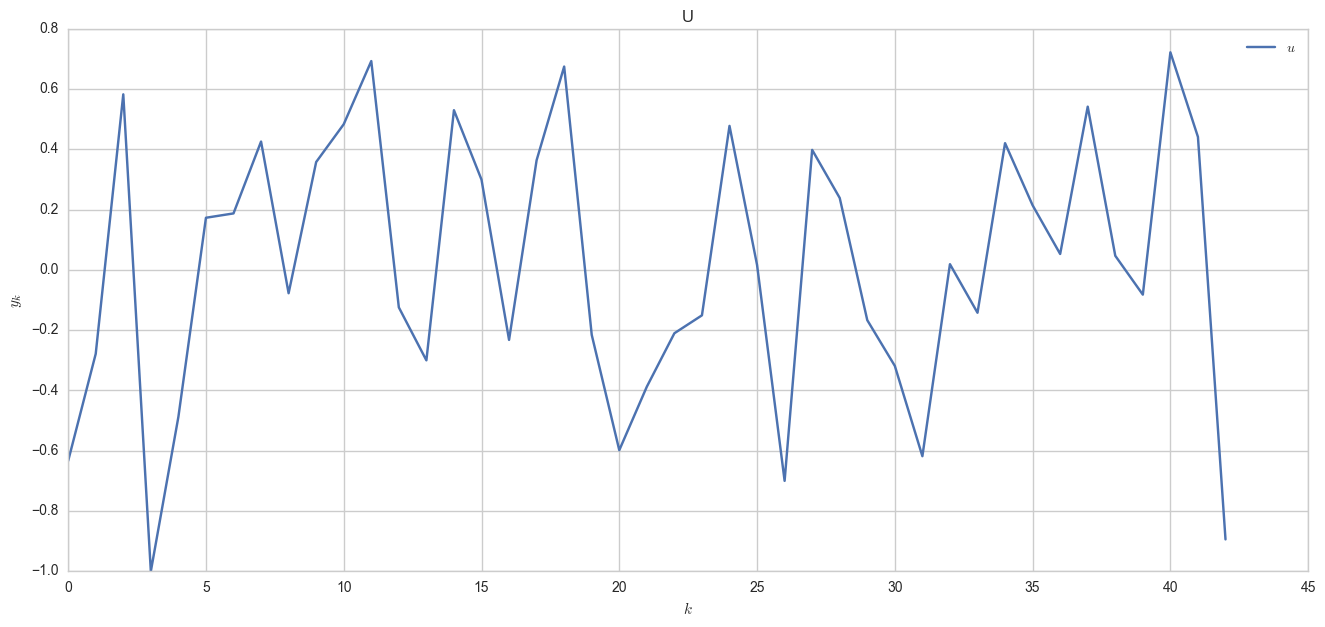

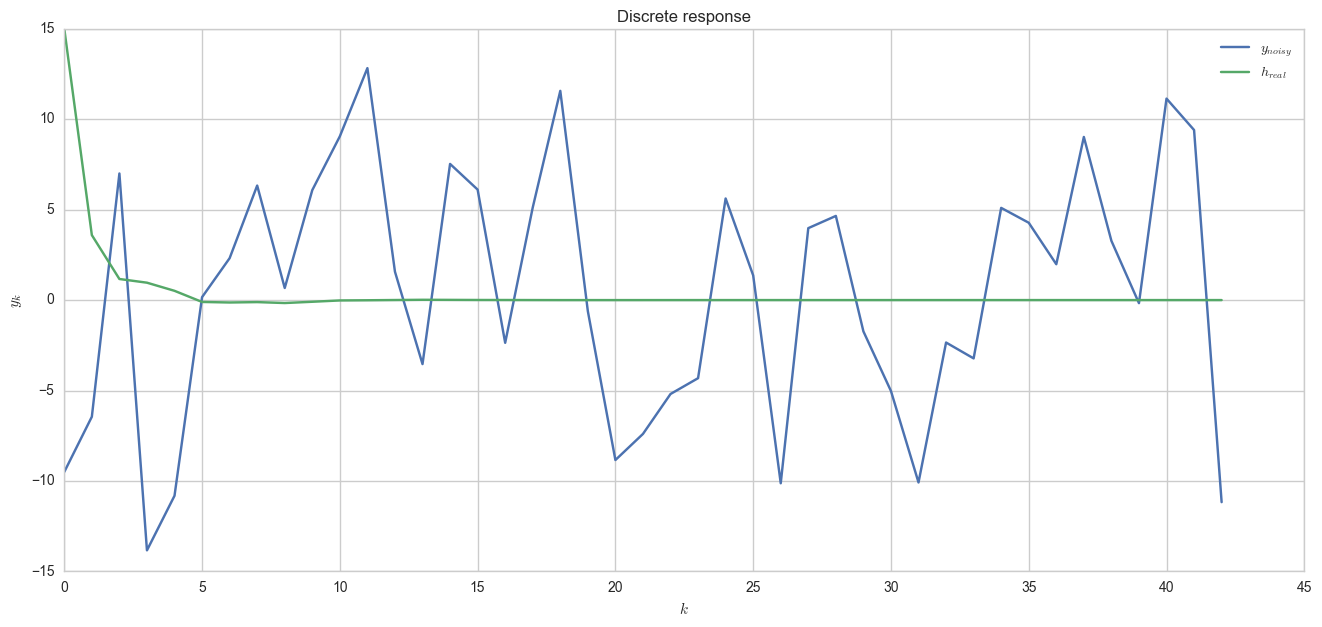

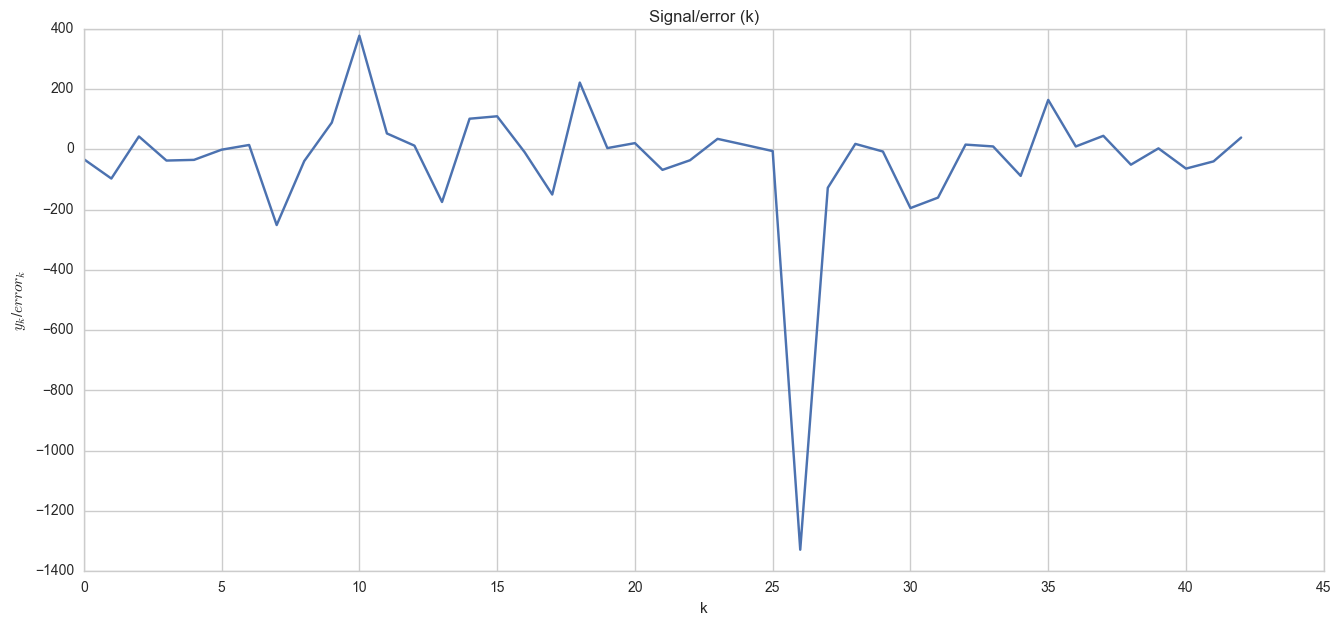

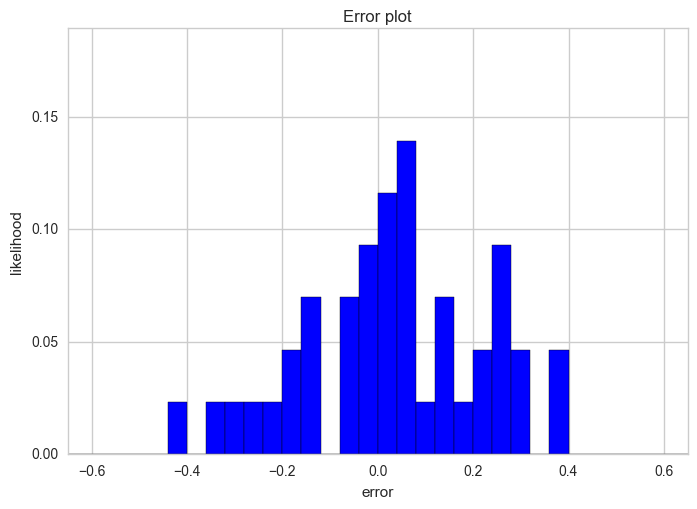

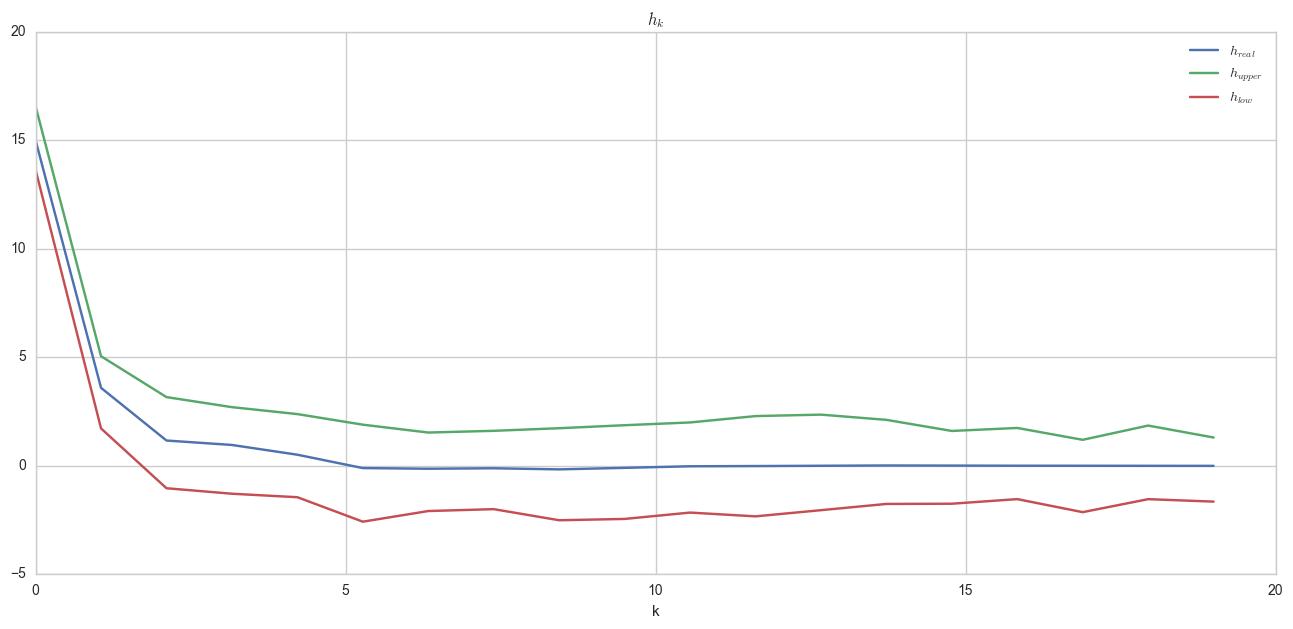

In [36]:
y, u, h_cent, h_low, h_up = make_results(0.5, 1, 19, norm_error, '2method/norm/')

binom:  10626.0
equations: 7893
% = 1.0


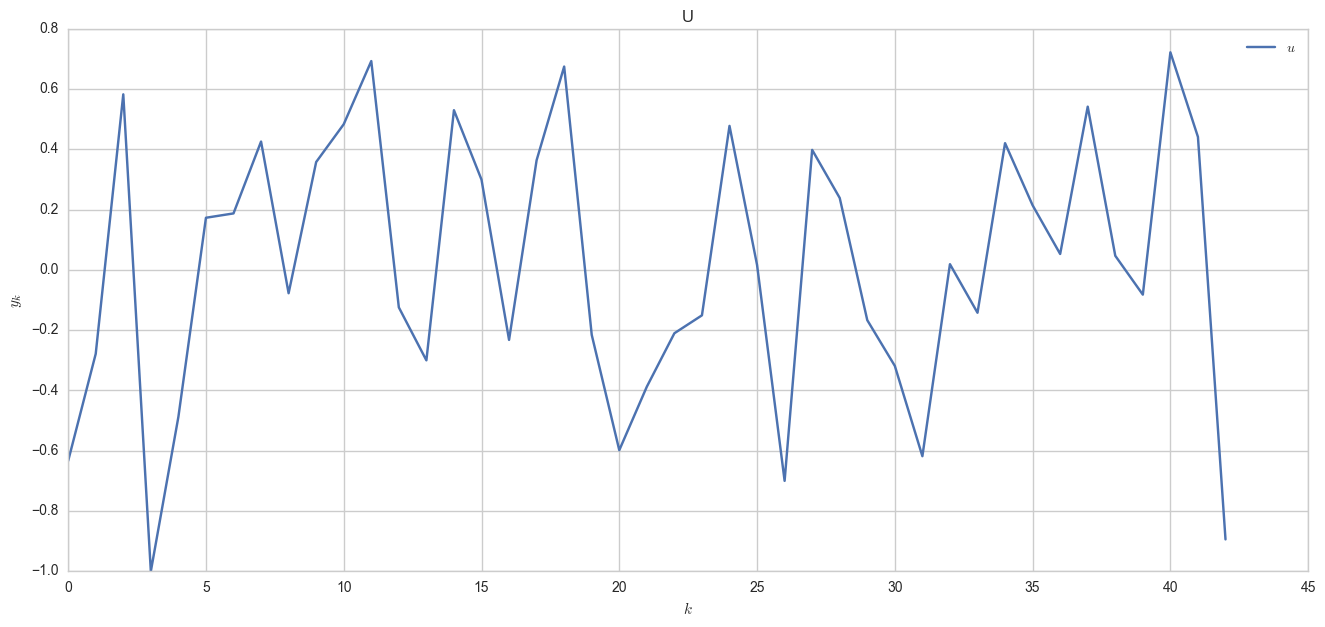

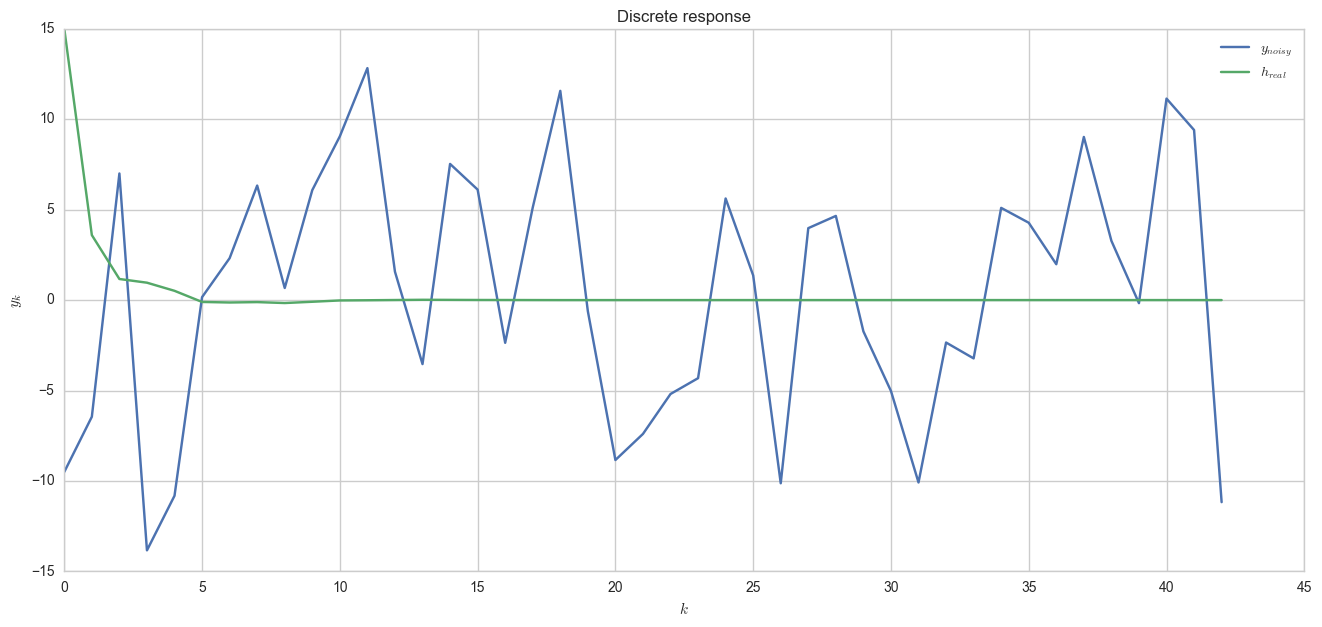

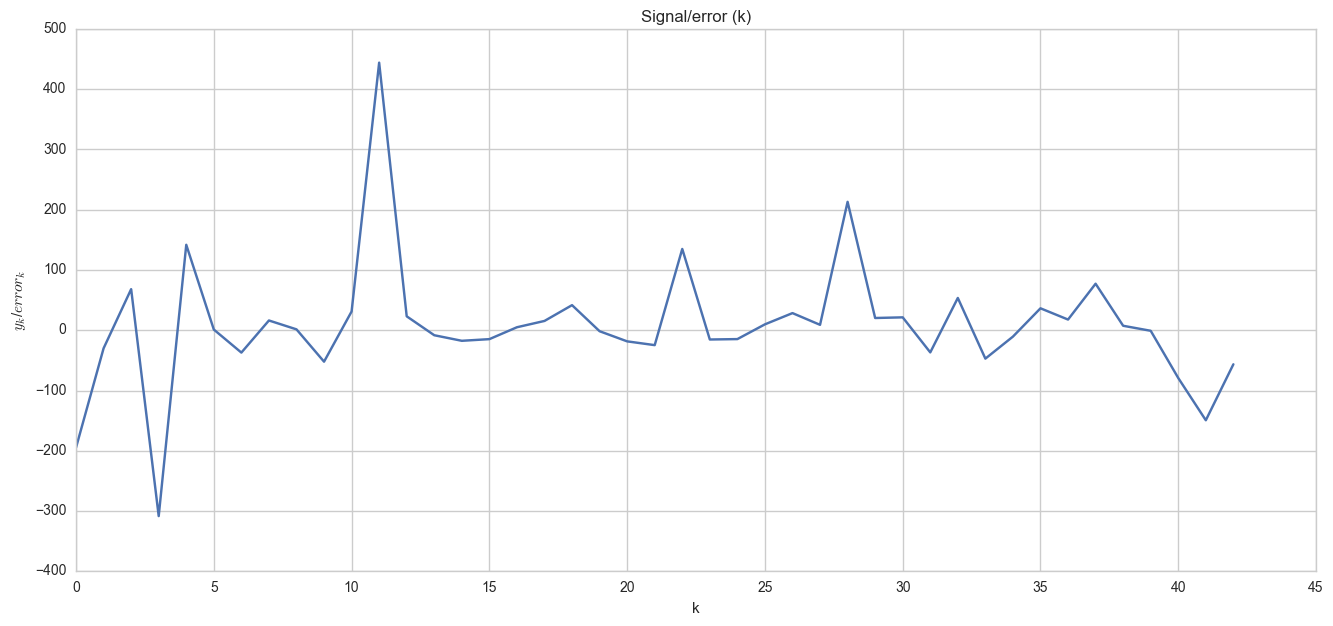

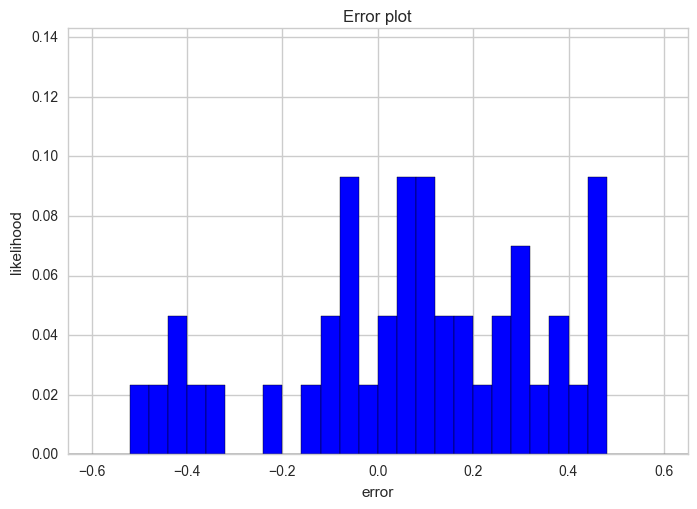

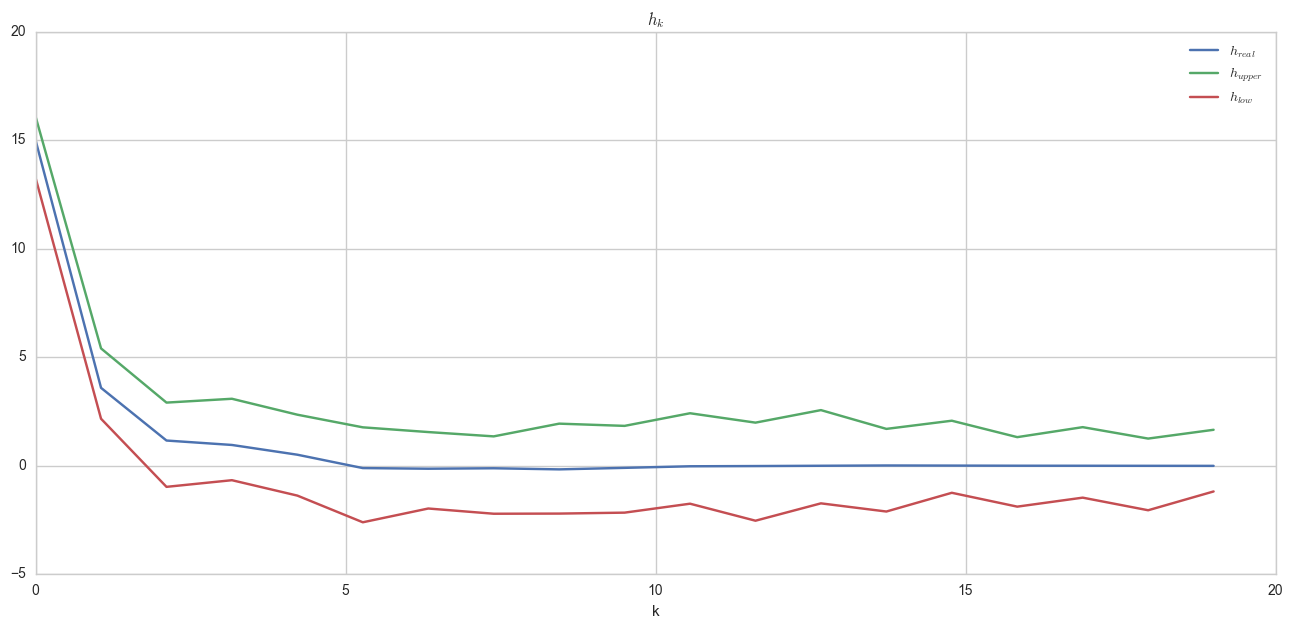

In [37]:
y, u, h_cent, h_low, h_up = make_results(0.5, 1, 19, uniform_error, '2method/2uniform/')

binom:  10626.0
equations: 7893
% = 1.0


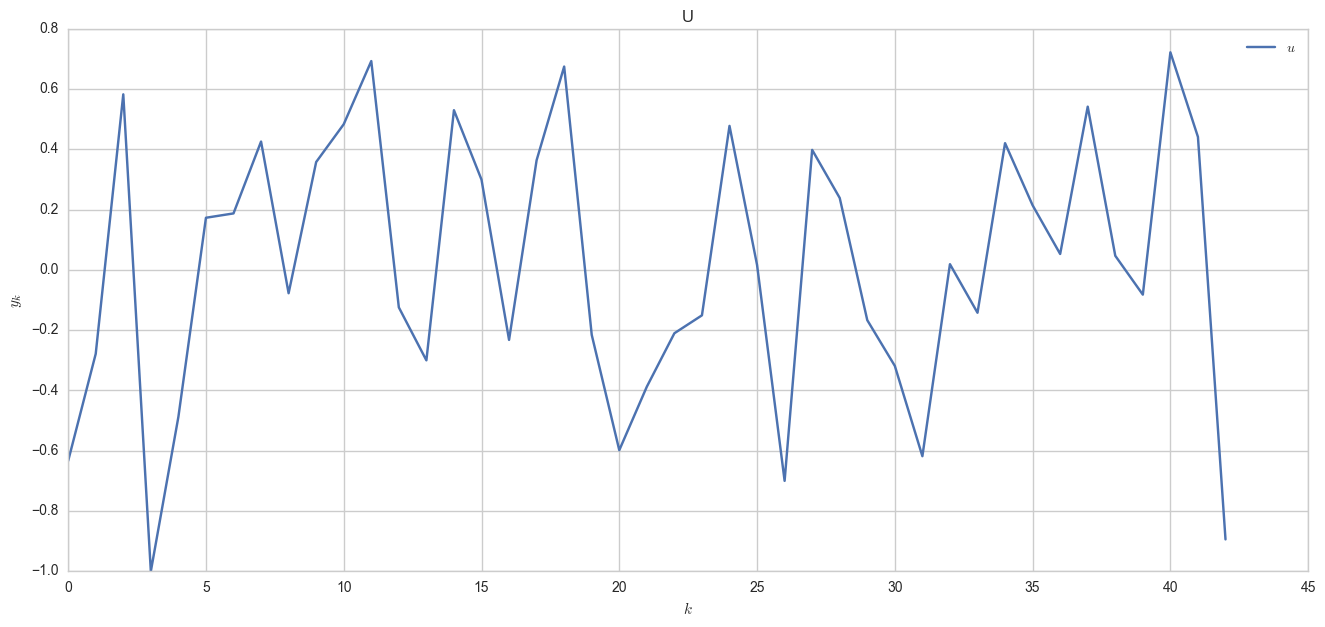

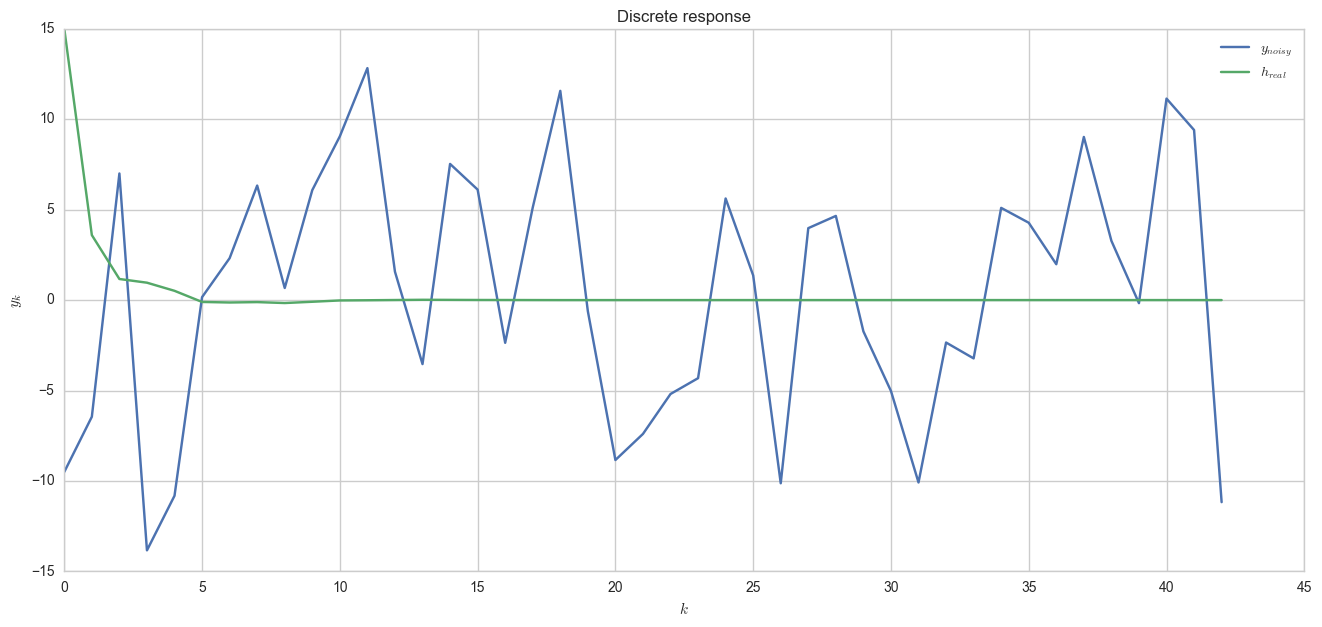

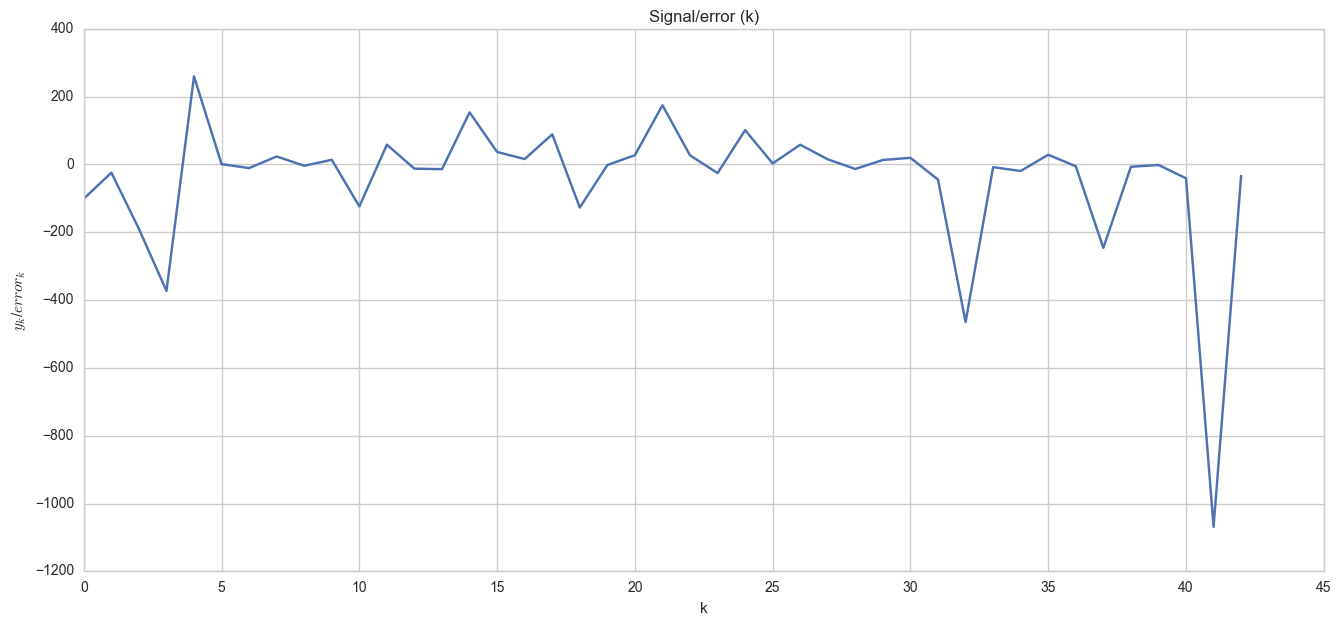

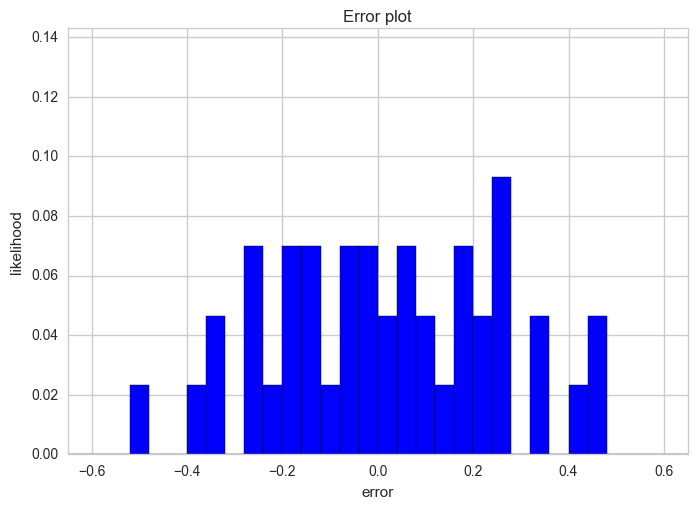

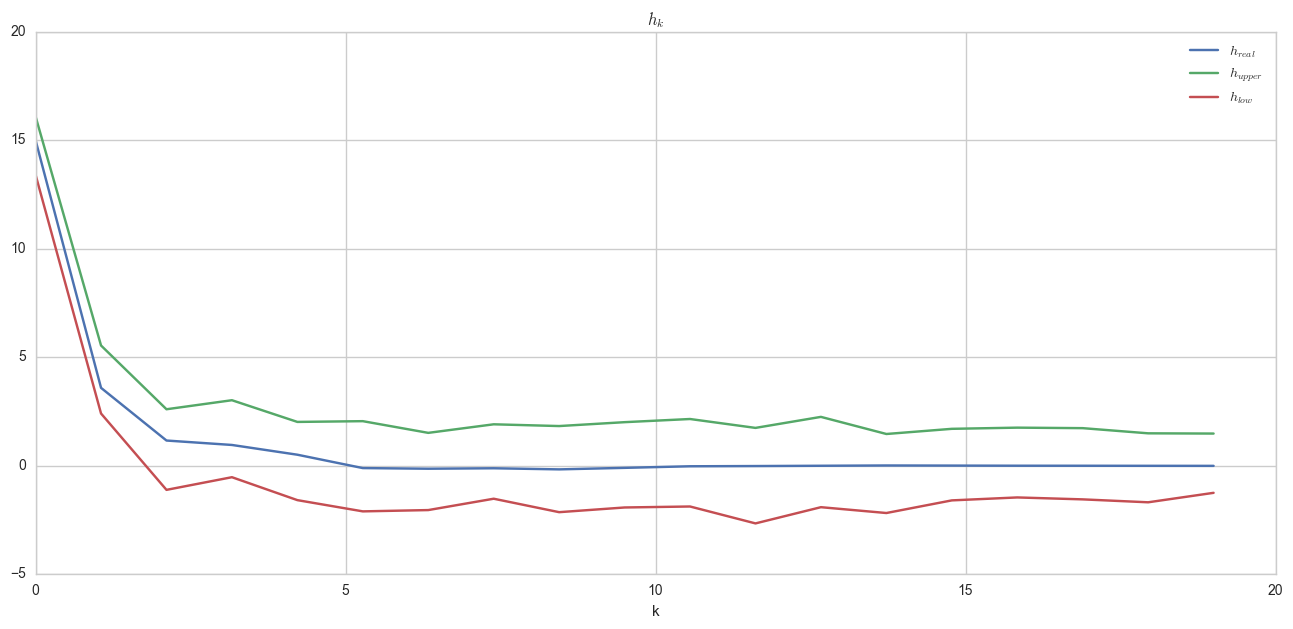

In [38]:
y, u, h_cent, h_low, h_up = make_results(0.5, 1, 19, two_peaks_error, '2method/two_peaks')